# NLTK (Natural Language Toolkit)

In [1]:
import csv
import nltk
import pandas as pd
# nltk.download()

## Counting words

In [5]:
headlines = []
word_count = []
with open('../dataset/headlines.csv', 'r') as fo:
    reader = csv.reader(fo)
    for title, source in reader: 
        tokens = nltk.word_tokenize(title)
        headlines.append(tokens)
        word_count.append(len(tokens))
print (word_count)
print (headlines[0])

[9, 14, 5, 11, 8, 11, 20, 11, 12, 10, 11, 11, 10, 9, 8, 16, 9, 9, 11, 10, 12, 6, 9, 10, 8]
['10', 'Dow', 'Jones', 'Stocks', 'to', 'Buy', 'Before', 'They', 'Rally']


Text(0.5, 0, 'number of words')

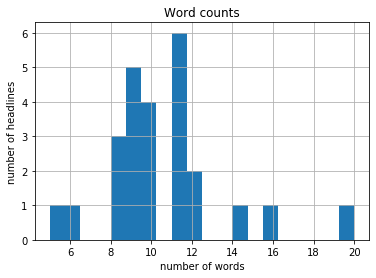

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt

stats = pd.DataFrame(word_count)
g = stats.hist(bins=20)
plt.title("Word counts")
plt.ylabel("number of headlines")
plt.xlabel("number of words")


## Removing stopwords

Text(0.5, 0, 'number of words')

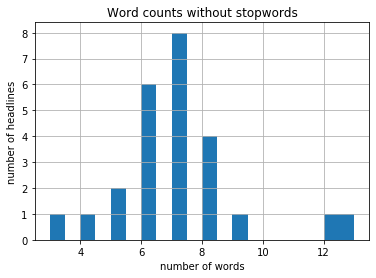

In [8]:
from nltk.corpus import stopwords

for i, t in enumerate(headlines):
    headlines[i] = [w.lower() for w in t if not w in stopwords.words("english") and w.isalpha()]
    word_count[i] = len(headlines[i])
stats = pd.DataFrame(word_count)

stats.hist(bins=20)
plt.title("Word counts without stopwords")
plt.ylabel("number of headlines")
plt.xlabel("number of words")

## Creating a dictionary

        

In [9]:
from collections import defaultdict
dictionary = defaultdict(dict)

for i, t in enumerate(headlines):
    for w in t:
        if dictionary.get(w, 0):
            dictionary[w]['count']  += 1
            dictionary[w]['headlines'].append(i)
        else:
            dictionary[w] = {'count': 1, 'headlines': [i]}

In [10]:
words = pd.DataFrame(dictionary).transpose()
print (words.sort_values('count', ascending=False))

         count                          headlines
stock        9  [1, 6, 9, 11, 15, 17, 18, 19, 23]
earnings     3                        [7, 21, 22]
is           3                        [9, 13, 20]
the          3                         [1, 2, 16]
rise         3                       [17, 19, 23]
...        ...                                ...
bank         1                                [6]
street       1                                [6]
wall         1                                [6]
second       1                                [6]
etfs         1                               [24]

[147 rows x 2 columns]


## Tagging words

In [11]:
nouns = []
words['tag'] = ""
for title in headlines:
    pos = nltk.pos_tag(title)
    for w, tag in pos:
        if tag in ('NNS', 'NN', 'NNP', 'NNPS'):
            words.loc[w]['tag'] = 'noun'
        if tag in ('JJ', 'JJS'):
            words.loc[w]['tag'] = 'adjective'
        if tag in ('VBP', 'VB', 'VBZ', 'VBD', 'VBG'):
            words.loc[w]['tag'] = 'verb'
        if tag in ('IN'):
            words.loc[w]['tag'] = 'prep'
        if tag in ('RP', 'RBR', 'RB', 'RBS', 'WRB'):
            words.loc[w]['tag'] = 'adv' 
        if tag in ('FW'):
            words.loc[w]['tag'] = 'foreign'
        if tag in ('MD'):
            words.loc[w]['tag'] = 'modal'


In [12]:
print (words)

       count headlines        tag
dow        1       [0]       noun
jones      1       [0]       noun
stocks     2   [0, 24]       noun
buy        1       [0]       verb
before     1       [0]       prep
...      ...       ...        ...
forget     1      [24]       verb
fang       1      [24]  adjective
bet        1      [24]       verb
wang       1      [24]  adjective
etfs       1      [24]       noun

[147 rows x 3 columns]


AxesSubplot(0.125,0.125;0.775x0.755)


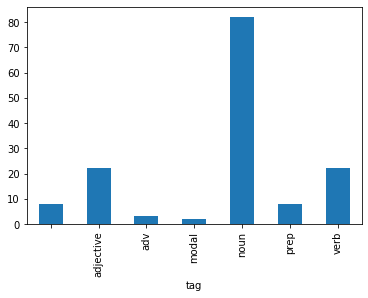

In [14]:
print (words.groupby('tag').count()['count'].plot.bar())